# Problem Statement

***The aim of this project is to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.***

## Dataset
*The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors.*



In [117]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [118]:
# Loading & Checking Dataset

data = pd.read_csv("/content/drive/MyDrive/Mid-Night Assignment/data (2).csv", sep = ';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 1. Data Acquisition and Preparation

### Data Cleaning

In [119]:
data.shape

(4424, 37)

In [120]:
# Checking for Null Values

data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

*There is no missing values present in the dataset.*

In [121]:
# Checking for duplicate values
duplicate = data[data.duplicated()]
print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


*There is no duplicate rows present in the dataset.*

In [122]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [123]:
# Replacing whitesapce present in the column name
data.columns = [x.replace(' ', '_') for x in data.columns]

In [124]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Exploratory Data Analysis

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4424 non-null   int64  
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening_attendance	                     4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

*There are 7 floating point numbers, 29 integers and just 1 object column.*

In [126]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

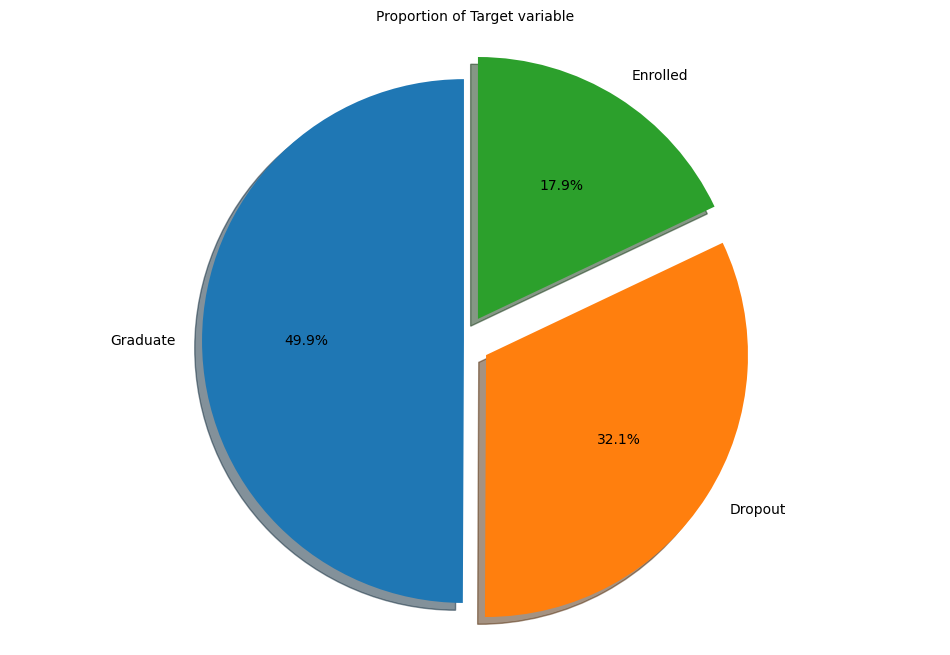

In [127]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [data.Target[data['Target']=='Graduate'].count(), data.Target[data['Target']=='Dropout'].count(), data.Target[data['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()

*From above pie chart,we can see that around 49.9% of the students are graduate, 32.1% students are dropout, and 17.1% of the students are enrolled in some other course, which indicates that half of the students from the total population are grduate.*

#### Lets visualize the distribution of continous random variables

In [128]:
# Create separate dataframe for continous random variables.

data_num = data.select_dtypes(include=['float64'])
data_num

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


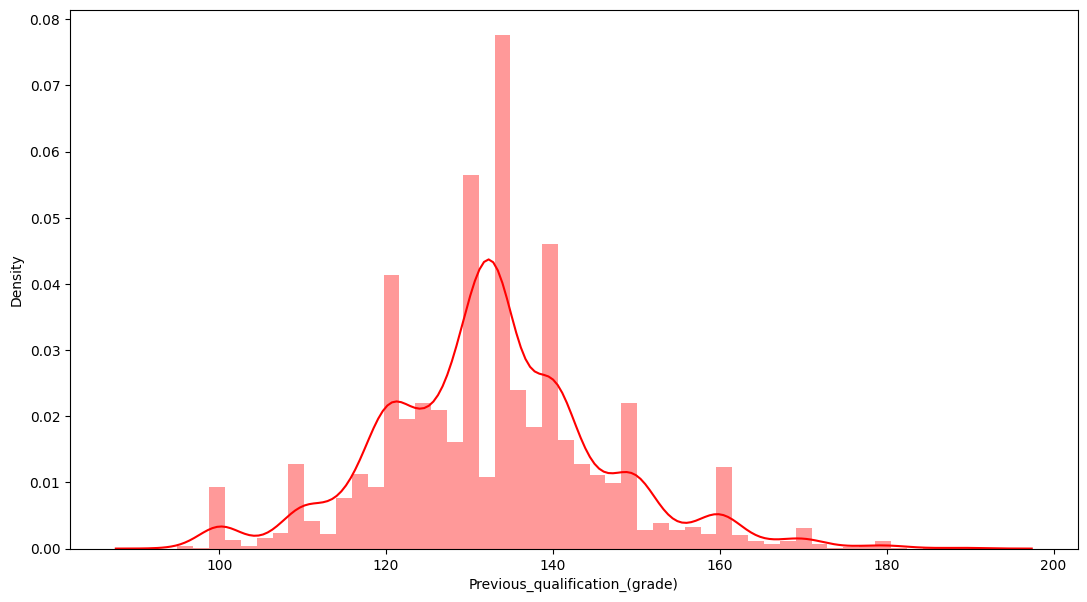

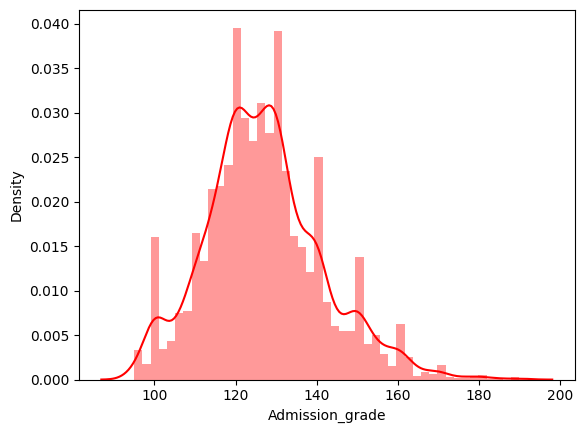

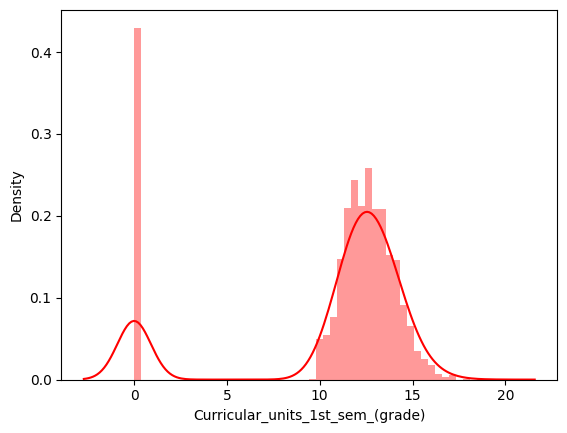

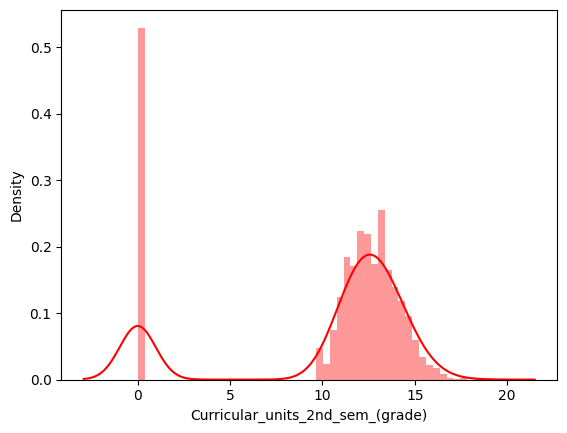

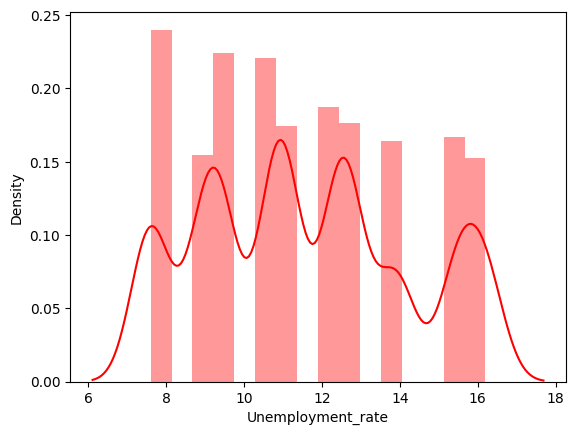

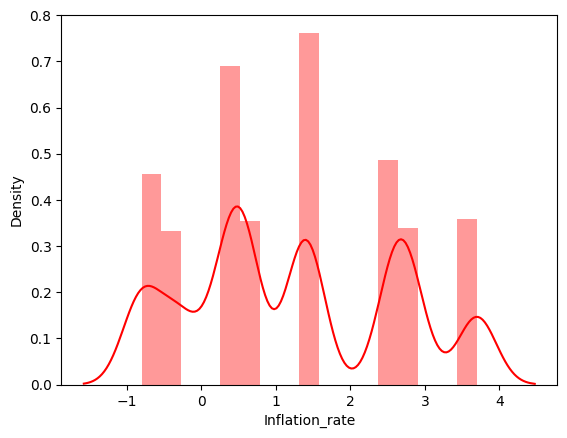

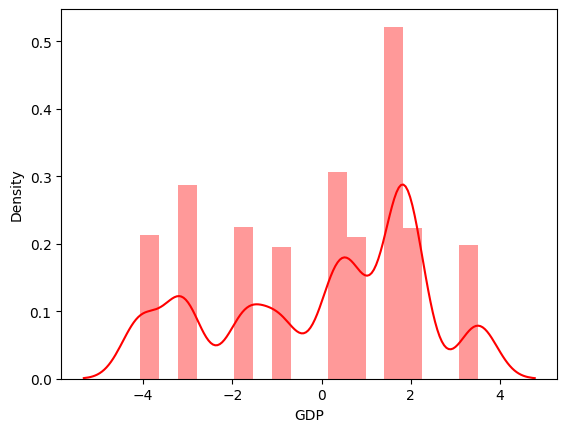

In [129]:
# Distribution Plot
plt.figure(figsize = (13, 7))

for i in data_num.columns:
    sns.distplot(data[i], color = 'red')
    plt.show()

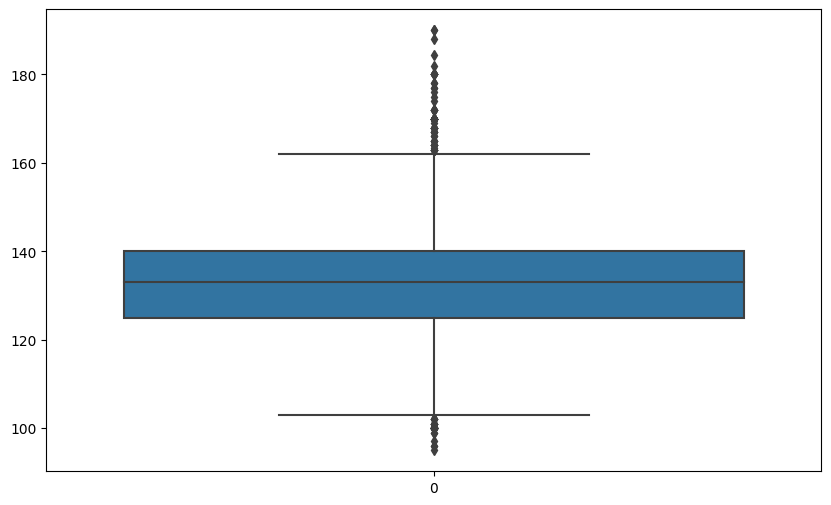

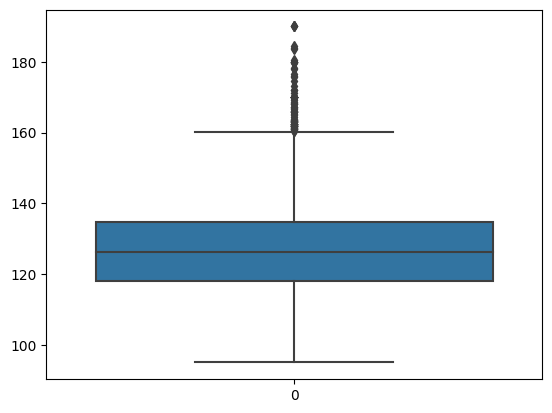

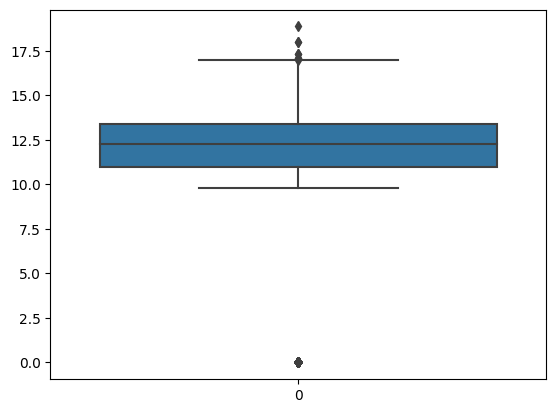

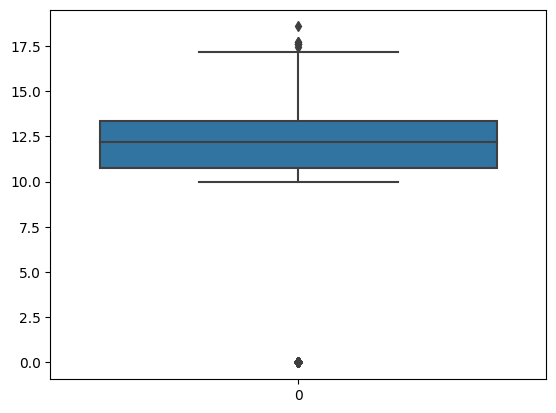

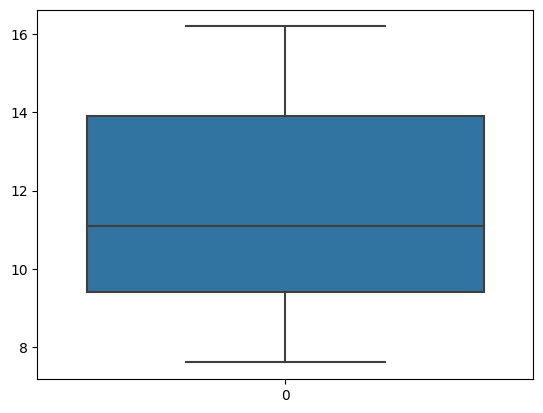

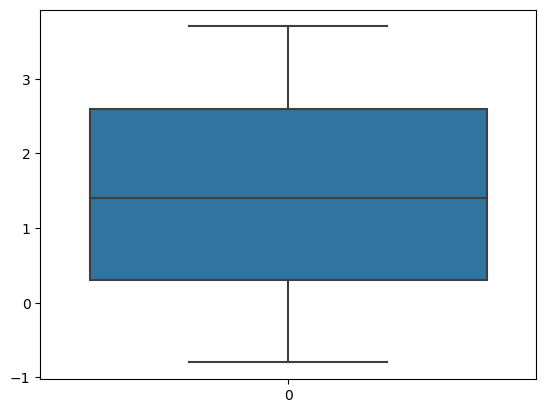

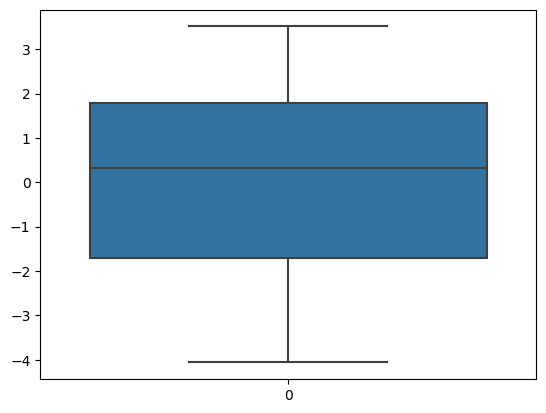

In [130]:
# BoxPlot
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

*From the above charts we can observe that the almost each feature contains an outliers except Unemployment rate, Inflation rate, and GDP.*

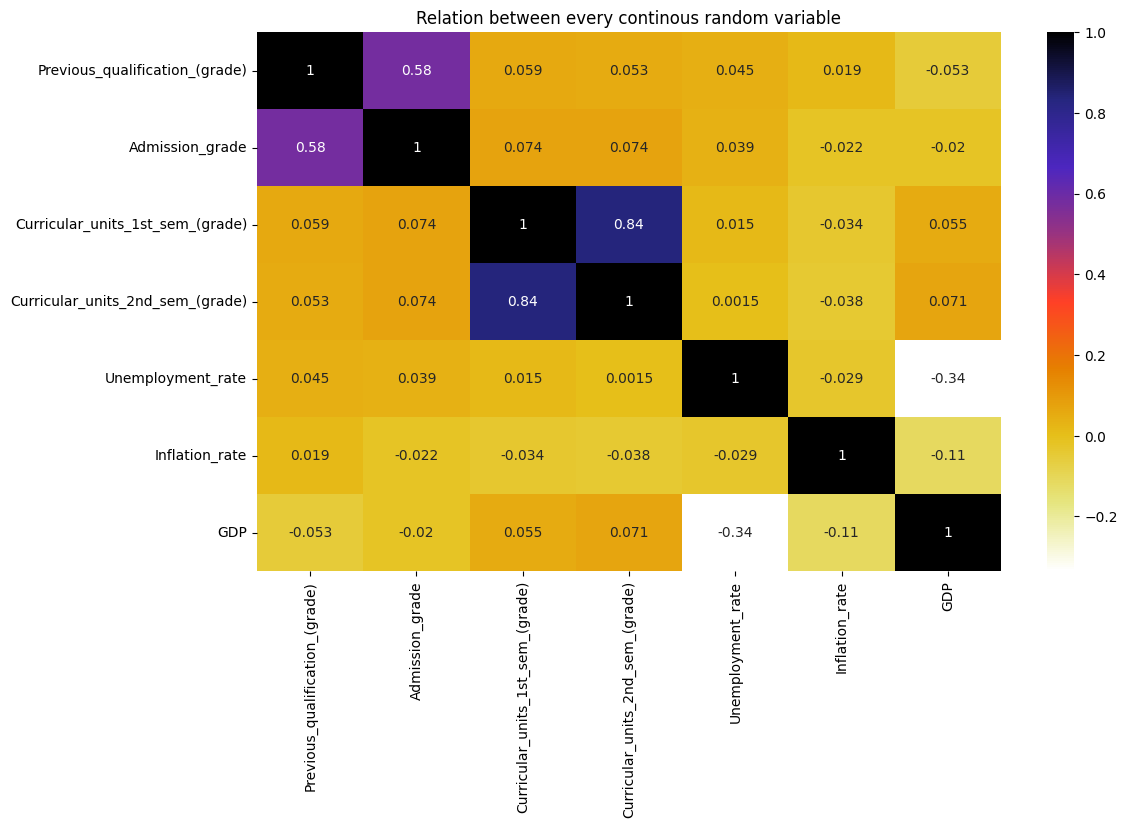

In [131]:
# Displaying Correlation between numerical varaibles using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation between every continous random variable')
plt.show()

*From the above plot we can observe that Curricular_units_1st_sem_(grade) & Curricular_units_2nd_sem_(grade) having strong correlation between them and Previous_qualification_(grade) &	Admission_grade is having average relation between them, whereas GDP, inflation rate, and unemployment rate having negative relation between them.*





#### Now let's visualize the discrete (categorical) random variables.


In [132]:
# Get the list of continous random variables
num_data = [cname for cname in data.columns if data[cname].dtypes in ['float64']]
num_data

['Previous_qualification_(grade)',
 'Admission_grade',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_2nd_sem_(grade)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [133]:
# Get the list of discrete random variables
cat_cols = data._get_numeric_data().columns
cat_cols

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd

In [134]:
# Separate discrete and continous random variables
cols = list(set(cat_cols) - set(num_data))
cols

['Daytime/evening_attendance\t',
 'Curricular_units_1st_sem_(enrolled)',
 'Gender',
 'Curricular_units_2nd_sem_(evaluations)',
 'Application_order',
 'Marital_status',
 'Scholarship_holder',
 'International',
 'Curricular_units_2nd_sem_(enrolled)',
 'Curricular_units_2nd_sem_(approved)',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Educational_special_needs',
 "Mother's_qualification",
 "Father's_qualification",
 'Curricular_units_1st_sem_(approved)',
 'Previous_qualification',
 'Debtor',
 'Curricular_units_1st_sem_(evaluations)',
 'Nacionality',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Displaced',
 "Father's_occupation",
 'Age_at_enrollment',
 'Curricular_units_2nd_sem_(credited)',
 'Course',
 "Mother's_occupation",
 'Application_mode',
 'Curricular_units_1st_sem_(credited)',
 'Tuition_fees_up_to_date']

In [135]:
len(cols)

29

In [136]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Now let's visualize the Categorical Data

### Univeriate and Bi-variate Analysis

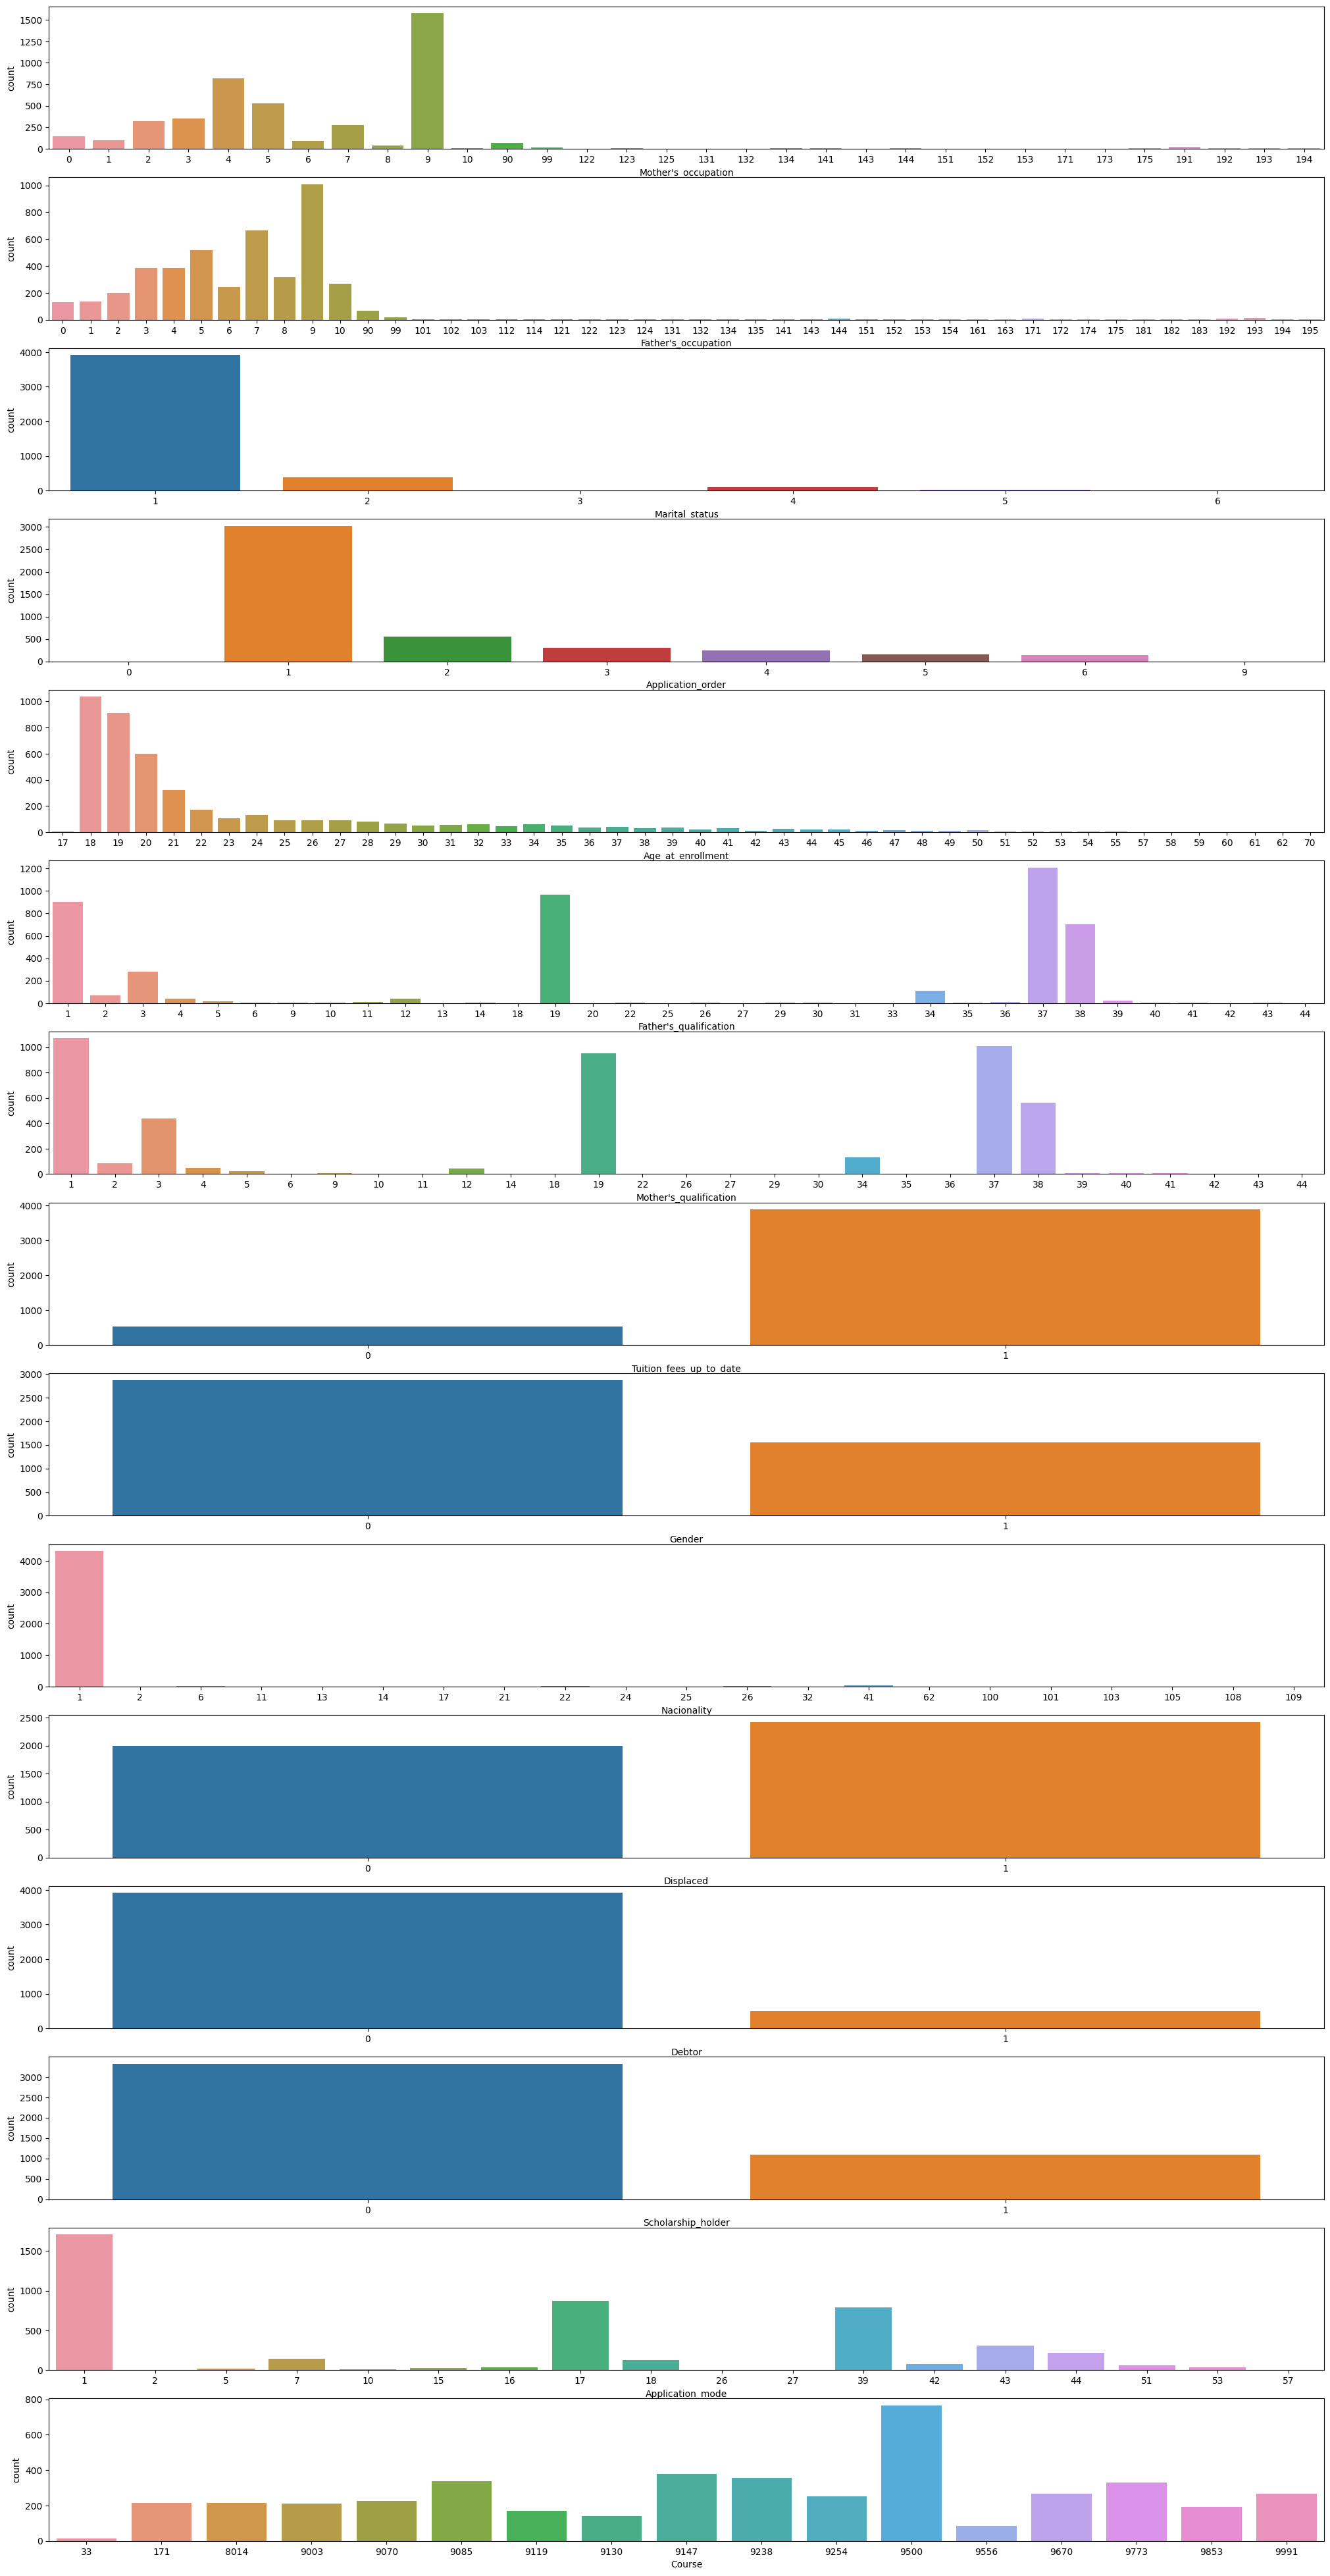

In [137]:
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(25, 50))

cols_ = ["Mother's_occupation",
 "Father's_occupation",
 'Marital_status',
 'Application_order',
 'Age_at_enrollment',
 "Father's_qualification",
 "Mother's_qualification",
 'Tuition_fees_up_to_date',
 'Gender',
  "Nacionality",
 'Displaced',
 'Debtor',
 "Scholarship_holder",
 'Application_mode',
 'Course']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data, ax=ax[ind])

## Insights

1. Maximum mothers are actually unskilled workers, followed by administrative staff, safety workers and sellers.
2. Maximum student's fathers are unskilled workers, followed by skilled workers in industry, safety workers, security staffs and sellers.
3. More than 90% of students from the given dataset are single.
4. Maximum students are enrolled at the age of 18, 19, and 20.
5. Maximum parents are having a very basic level of education starting from class 5th to 12th.
6. More than 90% students submit their tution fees on time.
7. In this group of students, more than 60% are females.
8. Almost every student in this group belongs to Portuguese.
9. Maximum students in this group are not the scholarship holders,
10. Maximum students in the group are followed the 1st phase of application mode followed by 2nd phase.
11. Maximum students enrolled themselves for the Nursing course followed by management, social service, journalism and communication course.

In [138]:
data['Tuition_fees_up_to_date'].value_counts()

1    3896
0     528
Name: Tuition_fees_up_to_date, dtype: int64

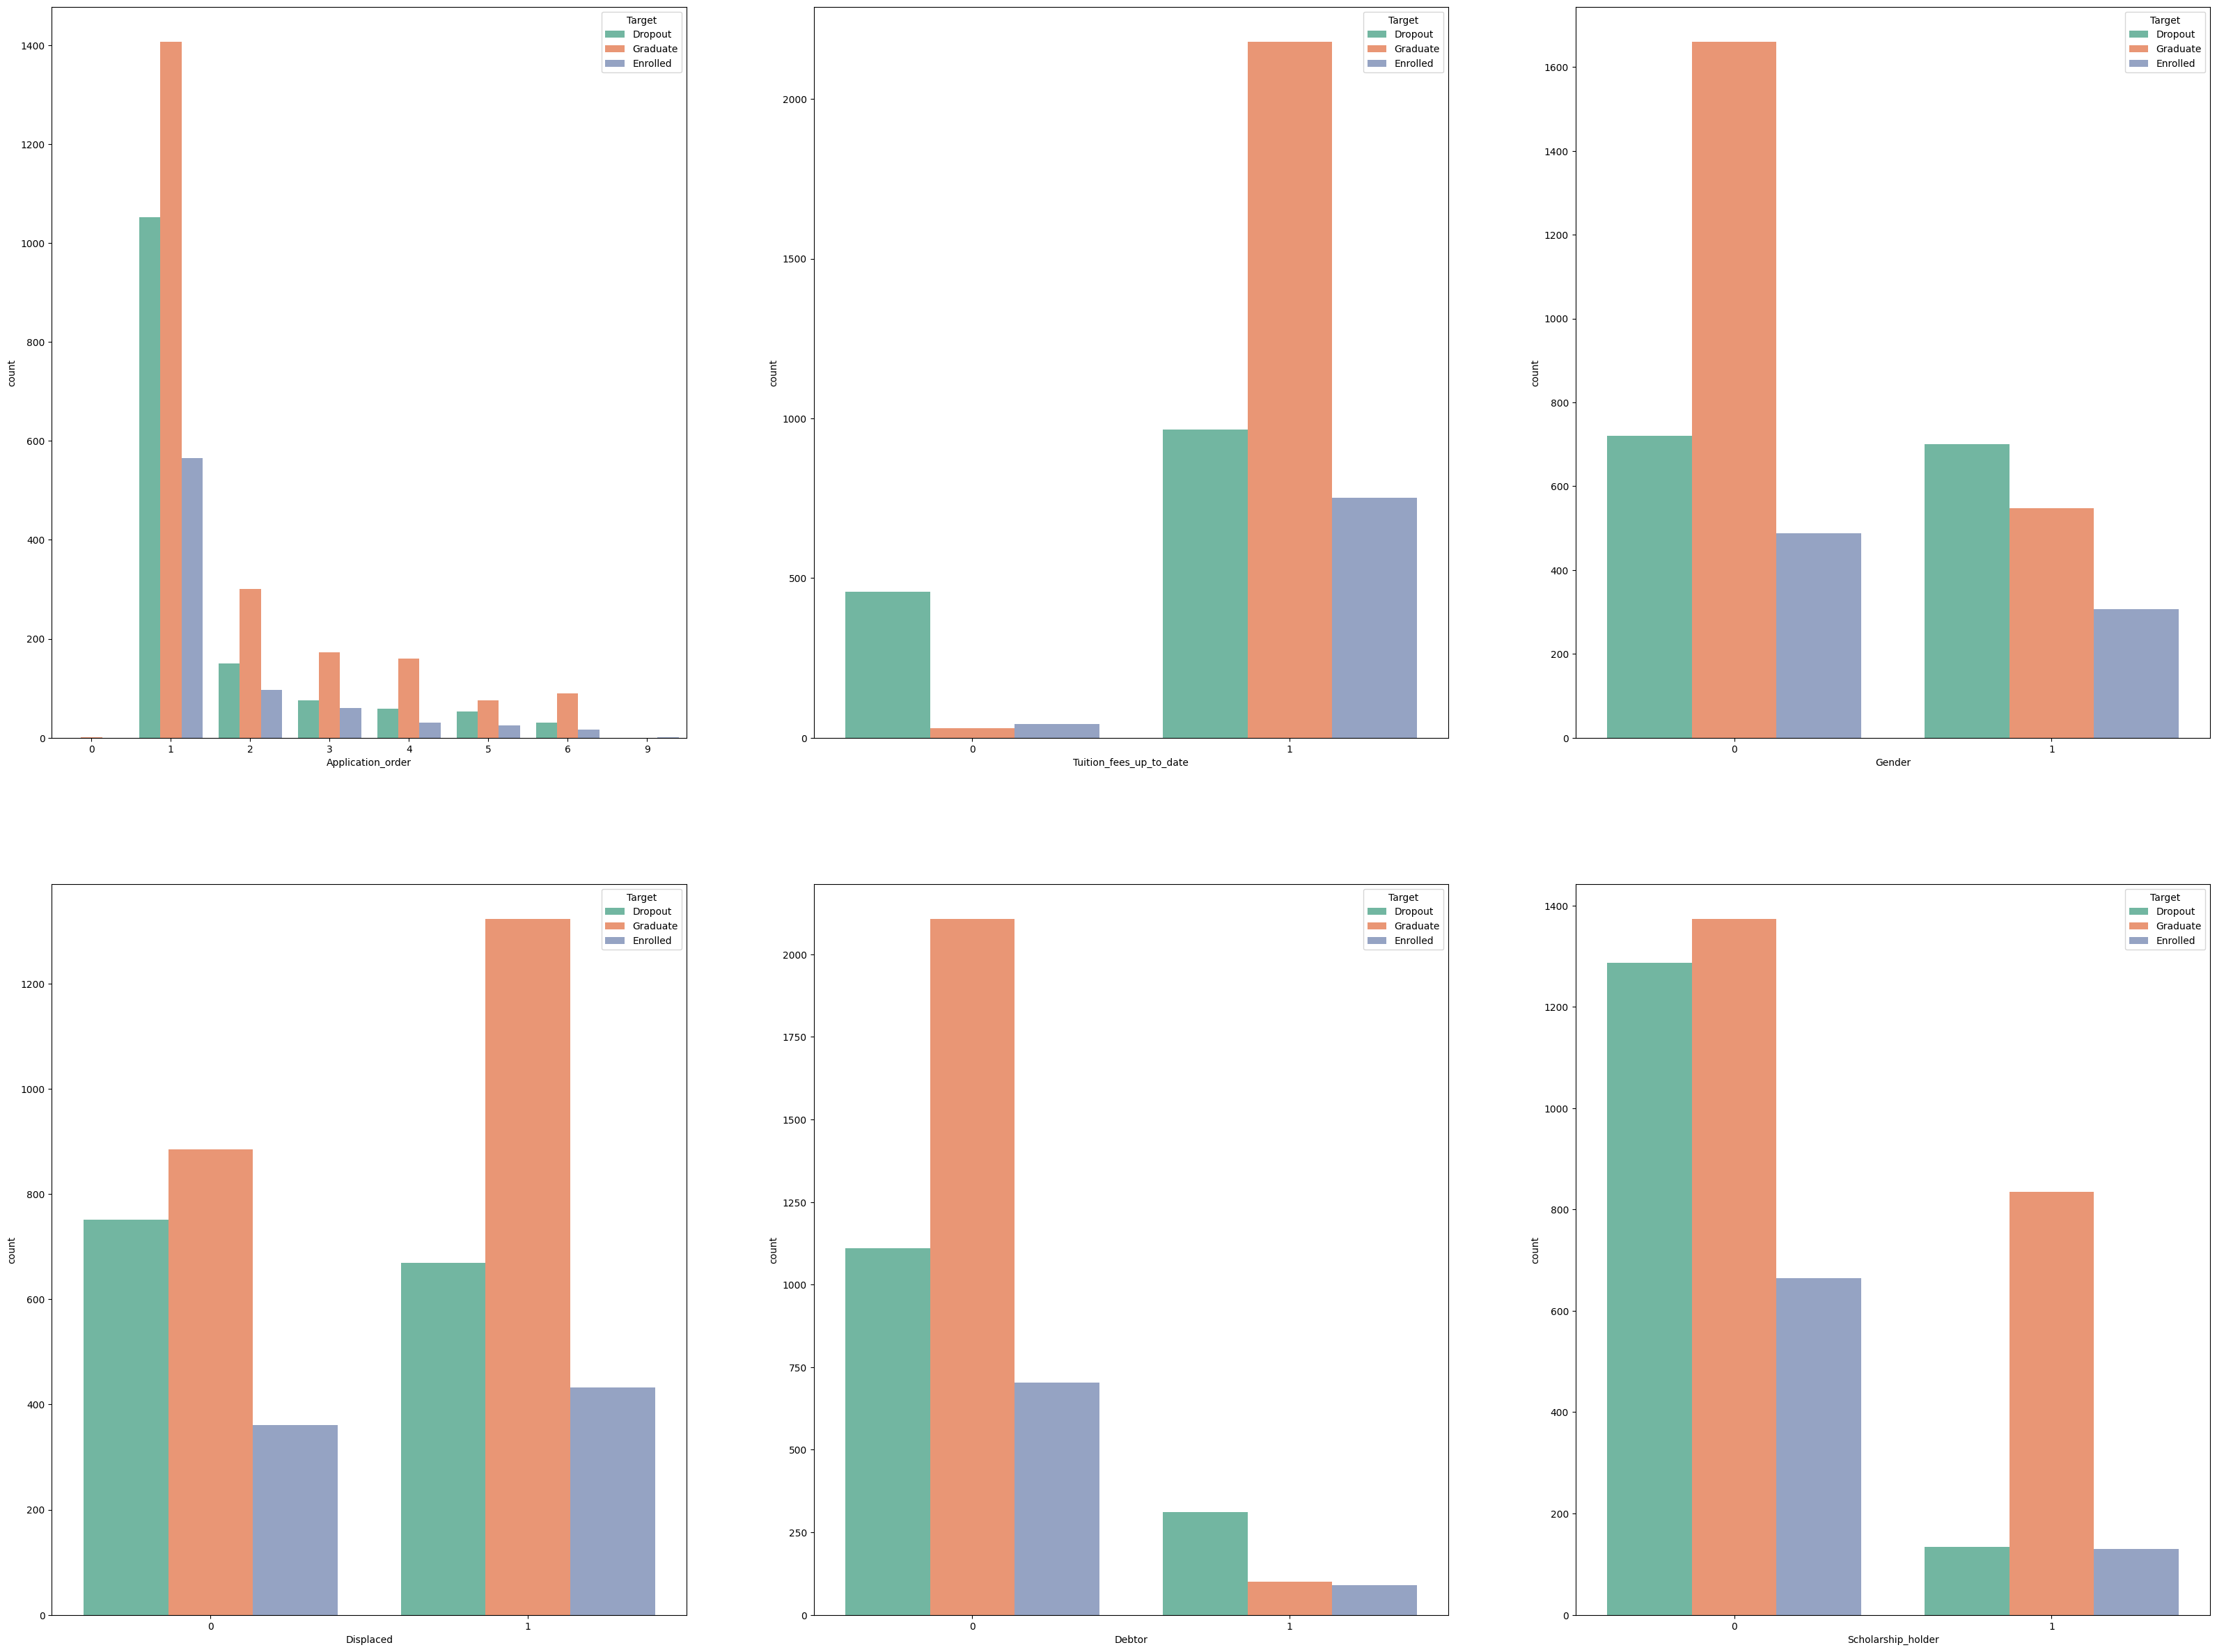

In [139]:
# Let's Analyze the impact of each of the above variable on the Target Variable

fig, ax = plt.subplots(2, 3, figsize=(40, 30))

sns.countplot(x='Application_order', hue='Target', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Tuition_fees_up_to_date', hue='Target', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='Gender', hue='Target', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='Displaced', hue='Target', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='Debtor', hue='Target', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Scholarship_holder', hue='Target', data=data, palette='Set2', ax=ax[1][2])


plt.show()

## Insights

1. We can observe here that those students who has not submitted the tution fees on time, they are having a higher chance of dropout.
2. Maximum males are droping out.
3. The students who are in debt, they are having a higher chance of droping out.

## Feature Engineering/ Feature Selection

### Handling Categorical Data

In [140]:
# Convert Target variable into numerical data

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

data['Target'] = le.fit_transform(data['Target'])

### Outlier Handling

In [141]:
data_num.columns

Index(['Previous_qualification_(grade)', 'Admission_grade',
       'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

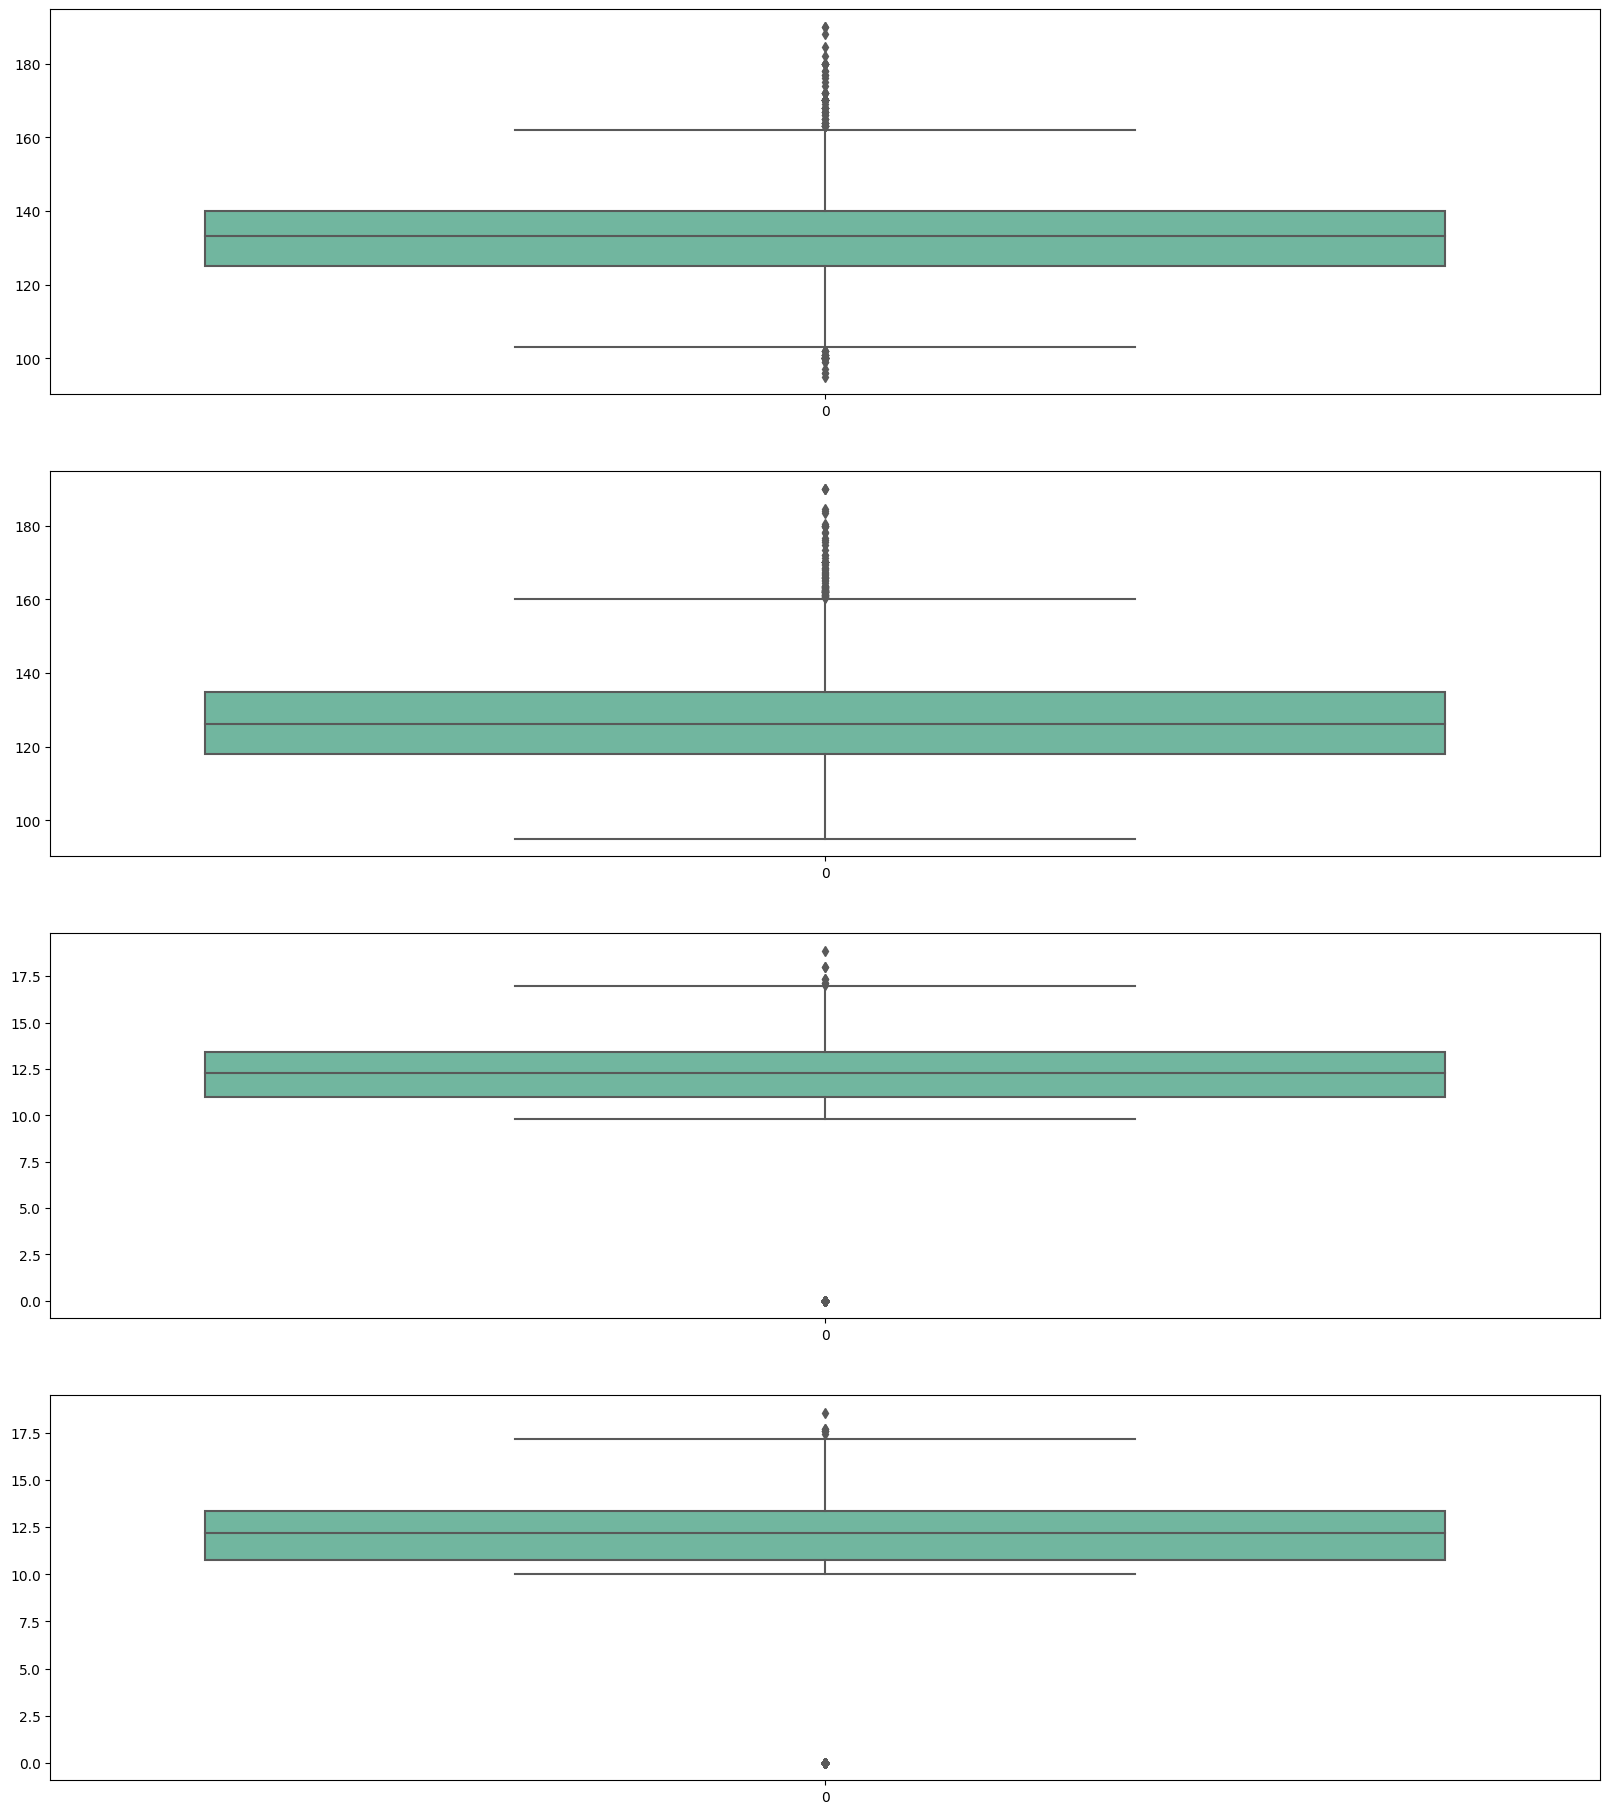

In [142]:
## Visualize the boxplot before outlier handling

fig, axs = plt.subplots(4,1, figsize = (20, 23))
plt1 = sns.boxplot(data['Previous_qualification_(grade)'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(data['Admission_grade'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(data['Curricular_units_1st_sem_(grade)'], ax = axs[2], palette = 'BuGn')
plt1 = sns.boxplot(data['Curricular_units_2nd_sem_(grade)'], ax = axs[3], palette = 'BuGn')

plt.show()

In [143]:
# Outlier Treatment for Previous_qualification_(grade)

Q1 = data['Previous_qualification_(grade)'].quantile(0.25)
Q3 = data['Previous_qualification_(grade)'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Previous_qualification_(grade)'] >= Q1 - 3*IQR) & (data['Previous_qualification_(grade)'] <= Q3 + 3*IQR)]

In [144]:
# Outlier Treatment for Admission_grade

Q1 = data['Admission_grade'].quantile(0.25)
Q3 = data['Admission_grade'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Admission_grade'] >= Q1 - 3*IQR) & (data['Admission_grade'] <= Q3 + 3*IQR)]

In [145]:
# Outlier Treatment for Curricular_units_1st_sem_(grade)'

Q1 = data['Curricular_units_1st_sem_(grade)'].quantile(0.25)
Q3 = data['Curricular_units_1st_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Curricular_units_1st_sem_(grade)'] >= Q1 - 3*IQR) & (data['Curricular_units_1st_sem_(grade)'] <= Q3 + 3*IQR)]

In [146]:
# Outlier Treatment for Curricular_units_2nd_sem_(grade)'

Q1 = data['Curricular_units_2nd_sem_(grade)'].quantile(0.25)
Q3 = data['Curricular_units_2nd_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Curricular_units_2nd_sem_(grade)'] >= Q1 - 3*IQR) & (data['Curricular_units_2nd_sem_(grade)'] <= Q3 + 3*IQR)]

In [147]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2


### Feature Selection using Chi-Square Test

Since we have 29 discrete (categorical) data, so we need to perform hypothesis testing to understand whether there is any relation between dependent and independent variables and then we can analyze the kind of relationship using graphs.
Let's have a chi-square test to understand the relation between target and independent variable.

In [148]:
from sklearn.feature_selection import chi2

In [149]:
#split df dataset into input and target variable

X = data[['Curricular_units_2nd_sem_(enrolled)','Scholarship_holder','Application_order','Curricular_units_1st_sem_(evaluations)',
 'Application_mode','Course','Nacionality','Curricular_units_1st_sem_(without_evaluations)','International','Curricular_units_2nd_sem_(without_evaluations)',
 'Age_at_enrollment','Curricular_units_1st_sem_(credited)','Curricular_units_2nd_sem_(credited)','Debtor','Daytime/evening_attendance\t',
 'Marital_status','Previous_qualification',"Mother's_qualification",'Curricular_units_1st_sem_(approved)',"Mother's_occupation",'Gender',
 'Displaced','Curricular_units_2nd_sem_(evaluations)','Tuition_fees_up_to_date','Educational_special_needs',"Father's_qualification",
 'Curricular_units_2nd_sem_(approved)','Curricular_units_1st_sem_(enrolled)',"Father's_occupation"]]
y = data['Target']

In [150]:
#returns f score and p value
f_score = chi2(X, y)

In [151]:
p_value = pd.Series(f_score[1],index = X.columns)
# sort p value series
p_value = p_value.sort_values(ascending = True)
# print p value
print(p_value)

Mother's_occupation                                0.000000e+00
Application_mode                                   0.000000e+00
Father's_occupation                               1.315731e-272
Curricular_units_2nd_sem_(approved)               1.597835e-148
Curricular_units_1st_sem_(approved)                6.108383e-92
Previous_qualification                             1.106835e-78
Age_at_enrollment                                  2.193555e-55
Curricular_units_2nd_sem_(evaluations)             5.509562e-53
Curricular_units_1st_sem_(evaluations)             3.685394e-47
Debtor                                             8.448138e-45
Course                                             9.805967e-41
Curricular_units_1st_sem_(credited)                1.879439e-40
Scholarship_holder                                 2.106448e-37
Mother's_qualification                             4.613949e-37
Curricular_units_2nd_sem_(credited)                4.435544e-33
Gender                                  

#### **According to Chi-Square (Test of Independence)**

1. Null Hypothesis -> Features are independent to each other.
2. Alternate Hypothesis -> Features are dependent.



*  If p-value ≥ 0.05, we failed to reject null hypothesis there is no relationship between target variable and input categorical features.

*  If p_value < 0.05, we can reject the null hypothesis that means target variables are dependent on input categorical variable.

In [152]:
i_cols=[]
significance_level = 0.05
for i in p_value.index:
    if p_value[i] <= significance_level:
        print(i,'    :- Reject NULL HYPOTHESIS')
    else:
        print(i,'   :-ACCEPT NULL HYPOTHESIS')
        i_cols.append(i)

Mother's_occupation     :- Reject NULL HYPOTHESIS
Application_mode     :- Reject NULL HYPOTHESIS
Father's_occupation     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(approved)     :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(approved)     :- Reject NULL HYPOTHESIS
Previous_qualification     :- Reject NULL HYPOTHESIS
Age_at_enrollment     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(evaluations)     :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(evaluations)     :- Reject NULL HYPOTHESIS
Debtor     :- Reject NULL HYPOTHESIS
Course     :- Reject NULL HYPOTHESIS
Curricular_units_1st_sem_(credited)     :- Reject NULL HYPOTHESIS
Scholarship_holder     :- Reject NULL HYPOTHESIS
Mother's_qualification     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(credited)     :- Reject NULL HYPOTHESIS
Gender     :- Reject NULL HYPOTHESIS
Curricular_units_2nd_sem_(without_evaluations)     :- Reject NULL HYPOTHESIS
Father's_qualification     :- Reject NULL HYPOTHESIS
Tuition

In [153]:
i_cols

['Marital_status',
 'Daytime/evening_attendance\t',
 'Educational_special_needs',
 'International']

From a chi square test, we can observe that there are only 4 features which are having no relation with the target variables, so we can simply drop those features and analyze rest of the features.

In [154]:
# dropping columns that will not add any value to prediction
data.drop(labels= i_cols, axis=1, inplace=True)

In [155]:
data.head()

,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,15,1,9254,1,160.0,1,1,3,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
3,17,2,9773,1,122.0,1,38,37,5,3,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,39,1,8014,1,100.0,1,37,38,9,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
5,39,1,9991,19,133.1,1,37,37,9,7,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
6,1,1,9500,1,142.0,1,19,38,7,10,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2


### Data Pre-processing (Splitting & Balancing the dataset)

In [156]:
data.drop(['Previous_qualification_(grade)','Curricular_units_1st_sem_(grade)'], axis = 1, inplace = True)

In [157]:
data.head()

,Application_mode,Application_order,Course,Previous_qualification,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,Admission_grade,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,15,1,9254,1,1,1,3,3,3,142.5,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
3,17,2,9773,1,1,38,37,5,3,119.6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,39,1,8014,1,1,37,38,9,9,141.5,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
5,39,1,9991,19,1,37,37,9,7,114.8,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
6,1,1,9500,1,1,19,38,7,10,128.4,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2


In [158]:
data.shape

(3509, 31)

In [159]:
X = data.drop('Target', axis = 1)
y = data.Target

In [160]:
# Balance the data using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
X_sm, y_sm = sm.fit_resample(X, y)

In [161]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 23)

## Model Building & Evaluation

In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

### Naive Bayes Clssifier

In [164]:
NB = GaussianNB()

# fit the model
NB.fit(X_train, y_train)

GaussianNB()

In [165]:
# Making Prediction

y_pred_nb = NB.predict(X_test)

In [166]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_nb))
print("F1-Score: ", f1_score(y_test, y_pred_nb, average= None))
print(classification_report(y_test, y_pred_nb))

Accuracy Score:  0.5973416731821736
F1-Score:  [0.56994819 0.55472901 0.66982249]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       393
           1       0.52      0.59      0.55       441
           2       0.71      0.64      0.67       445

    accuracy                           0.60      1279
   macro avg       0.60      0.60      0.60      1279
weighted avg       0.60      0.60      0.60      1279



### Decision Tree Classifier

In [167]:
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [168]:
# Making Prediction
y_pred_dt = dt.predict(X_test)

In [169]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt, average= None))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.7169663799843627
F1-Score:  [0.70036991 0.69844789 0.75266272]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       393
           1       0.68      0.71      0.70       441
           2       0.80      0.71      0.75       445

    accuracy                           0.72      1279
   macro avg       0.72      0.72      0.72      1279
weighted avg       0.72      0.72      0.72      1279



### Random Forest Classifier

In [170]:
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
# Making Prediction
y_pred_rf = rf.predict(X_test)

In [172]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("F1-Score: ", f1_score(y_test, y_pred_rf, average= None))
print(classification_report(y_test, y_pred_rf))

Accuracy Score:  0.8491008600469117
F1-Score:  [0.86684073 0.82681564 0.85618729]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       393
           1       0.81      0.84      0.83       441
           2       0.85      0.86      0.86       445

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279



## HyperParameter Tunning

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 30, 15)]

# Minimum number of samples required to split a node
min_samples_split = [5, 8, 10, 12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6, 8, 12, 15]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy', 'gini']}

In [175]:
model_rscv = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter = 100, cv = 5,
                                n_jobs = -1, random_state = 42)

model_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30],
                                        'min_samples_leaf': [4, 6, 8, 12, 15],
                                        'min_samples_split': [5, 8, 10, 12],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42)

In [176]:
model_rscv.best_params_

{'n_estimators': 277,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 22,
 'criterion': 'entropy'}

In [177]:
best_random = model_rscv.best_estimator_
best_random

RandomForestClassifier(criterion='entropy', max_depth=22, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=277)

In [178]:
# Making Prediction

y_pred_rf_rscv = best_random.predict(X_test)

In [179]:
# Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf_rscv))
print("F1-Score: ", f1_score(y_test, y_pred_rf_rscv, average= None))
print(classification_report(y_test, y_pred_rf_rscv))

Accuracy Score:  0.8060985144644254
F1-Score:  [0.79672578 0.78516903 0.83480176]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       393
           1       0.76      0.82      0.79       441
           2       0.82      0.85      0.83       445

    accuracy                           0.81      1279
   macro avg       0.81      0.80      0.81      1279
weighted avg       0.81      0.81      0.81      1279



### Extreme Gradient Boosting Classifier (XG Boost)

In [180]:
xgb = XGBClassifier()

# fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [181]:
# Making Prediction
y_pred_xgb = xgb.predict(X_test)

In [182]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_xgb))
print("F1-Score: ", f1_score(y_test, y_pred_xgb, average= None))
print(classification_report(y_test, y_pred_xgb))

Accuracy Score:  0.8475371383893667
F1-Score:  [0.85900783 0.82138794 0.86308872]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       393
           1       0.82      0.82      0.82       441
           2       0.84      0.89      0.86       445

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279



## LightGBM Classifier

In [183]:
# Fitting LightGBM on balance data

from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1868
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 30
[LightGBM] [Info] Start training from score -1.079247
[LightGBM] [Info] Start training from score -1.107253
[LightGBM] [Info] Start training from score -1.109623


LGBMClassifier()

In [184]:
# Making Prediction
lgb_predict = lgb.predict(X_test)

In [185]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, lgb_predict))
print("F1-Score: ", f1_score(y_test, lgb_predict, average= None))
print(classification_report(y_test, lgb_predict))

Accuracy Score:  0.8420641125879593
F1-Score:  [0.85151117 0.81271283 0.86244541]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       393
           1       0.81      0.81      0.81       441
           2       0.84      0.89      0.86       445

    accuracy                           0.84      1279
   macro avg       0.84      0.84      0.84      1279
weighted avg       0.84      0.84      0.84      1279



## CatBoost Classifier

In [186]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [187]:
from catboost import Pool, CatBoostClassifier, cv

model = CatBoostClassifier(random_seed = 350, iterations=500)

#fitting the train data
model.fit(X_train, y_train,verbose=False)

In [188]:
# Making Prediction
cat_predict = model.predict(X_test)

In [189]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, cat_predict))
print("F1-Score: ", f1_score(y_test, cat_predict, average= None))
print(classification_report(y_test, cat_predict))

Accuracy Score:  0.8498827208756842
F1-Score:  [0.86563307 0.82633371 0.8593577 ]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       393
           1       0.83      0.83      0.83       441
           2       0.85      0.87      0.86       445

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279



## Comparison!!!

In [190]:
## Comparision

Models = pd.DataFrame({'Classifiers':['DecisionTree', 'XGBoost','LightGBM','RandomForest','CatBoost'], 'Accuracy': [accuracy_score(y_test, y_pred_dt)*100,accuracy_score(y_test, y_pred_xgb)*100,accuracy_score(y_test, lgb_predict)*100,accuracy_score(y_test, y_pred_rf)*100,accuracy_score(y_test, cat_predict)*100]})

In [192]:
Models

,Classifiers,Accuracy
0,DecisionTree,71.696638
1,XGBoost,84.753714
2,LightGBM,84.206411
3,RandomForest,84.910086
4,CatBoost,84.988272


<Axes: xlabel='Classifiers', ylabel='Accuracy'>

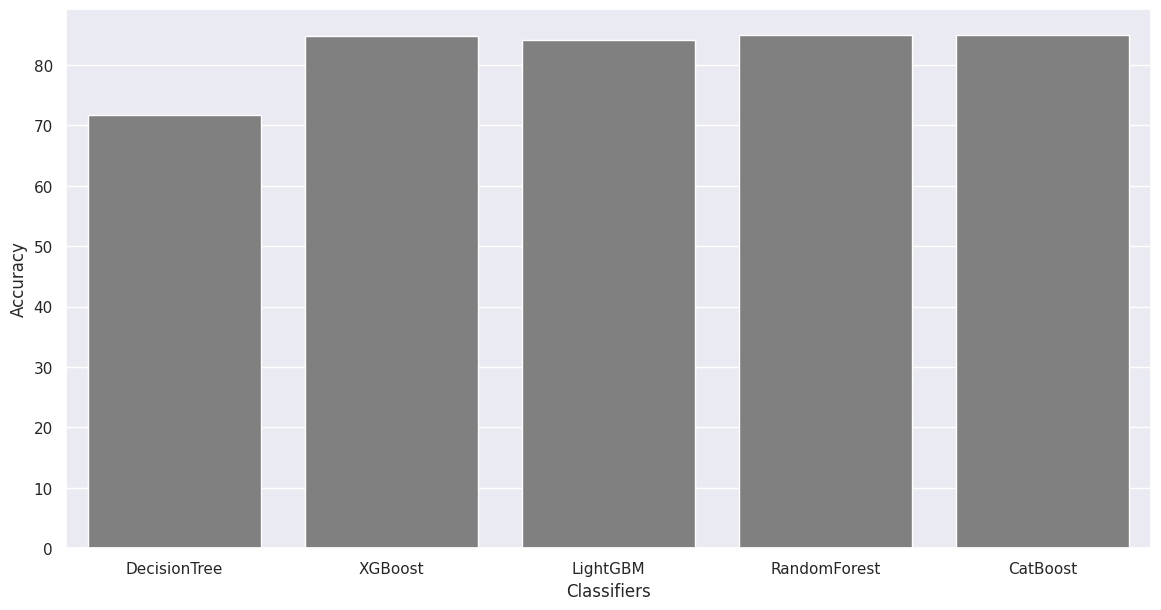

In [193]:
plt.figure(figsize=(14,7))

sns.barplot(x = 'Classifiers', y = 'Accuracy', data = Models, color="gray")

#### Confusion Matrix

Text(153.75, 0.5, 'Truth')

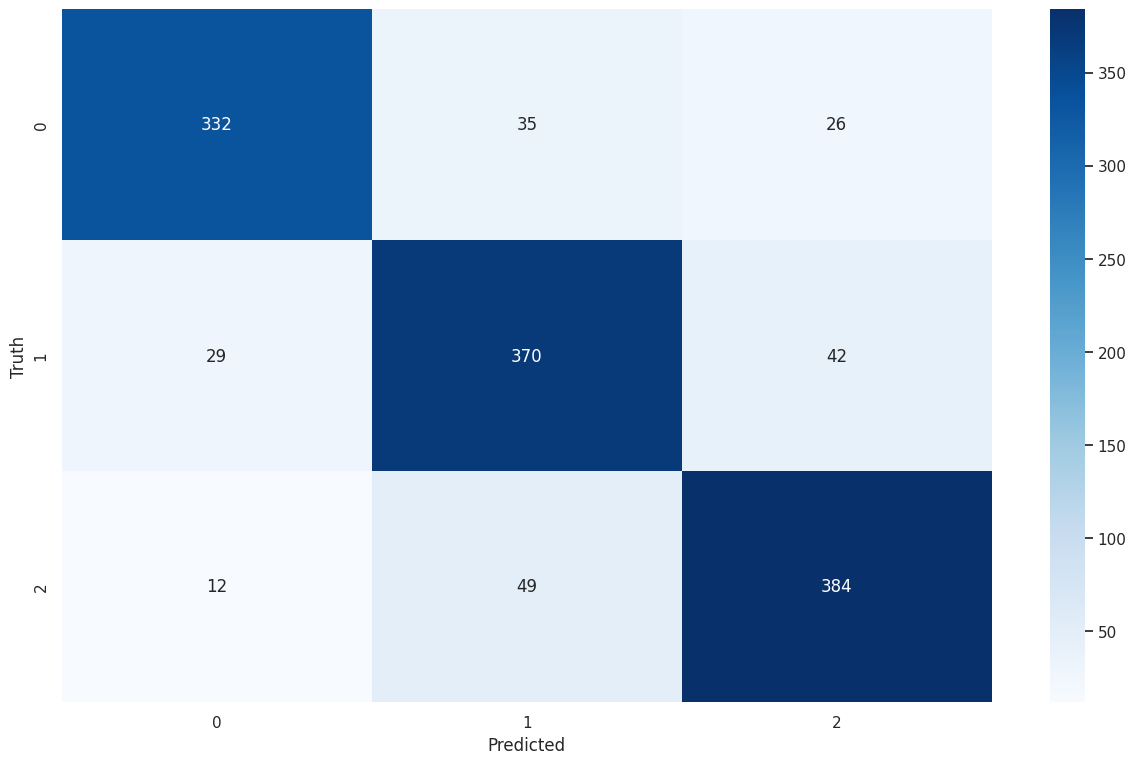

In [194]:
# Plot the Confusion Matrix


cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (15, 9))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')